In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## SETUP

The function to minimize is:

$(x^2 -1 )\cos(4\pi x)(y^2-1)\cos(2\pi y)$

In [2]:
def f2min(x):
    return (x[0]**2-1)*(x[1]**2-1)*np.cos(4*np.pi*x[0])*np.cos(2*np.pi*x[1])

Visualization:

In [3]:
x = np.linspace(-1.,1.,100)
y = np.linspace(-1.,1.,100)
xx, yy = np.meshgrid(x,y)
zz = f2min([xx,yy])

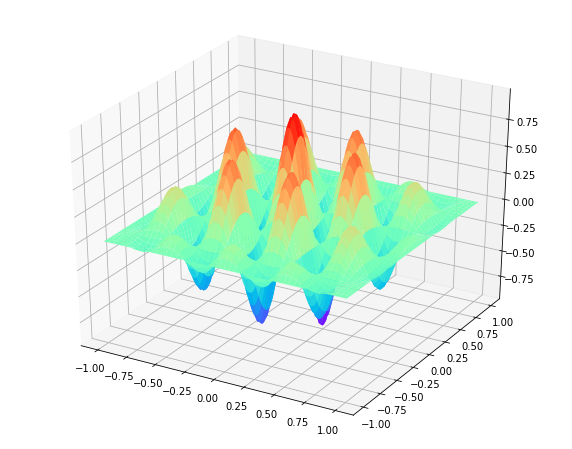

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax3d = ax.plot_surface(xx,yy,zz, cmap = 'rainbow')

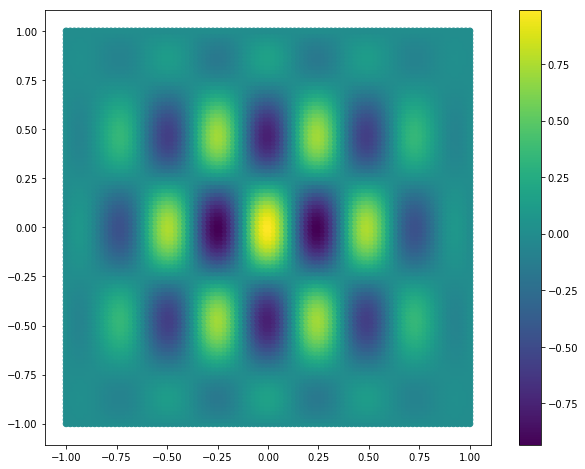

In [5]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.colorbar(cb)

## BASIC OPTIMIZERS: scipy.optimize.minimze

### Nelder-Mead

In [16]:
from scipy.optimize import minimize
x0 = [0.45,0.]
res = minimize(f2min, x0=x0, method='Nelder-Mead')

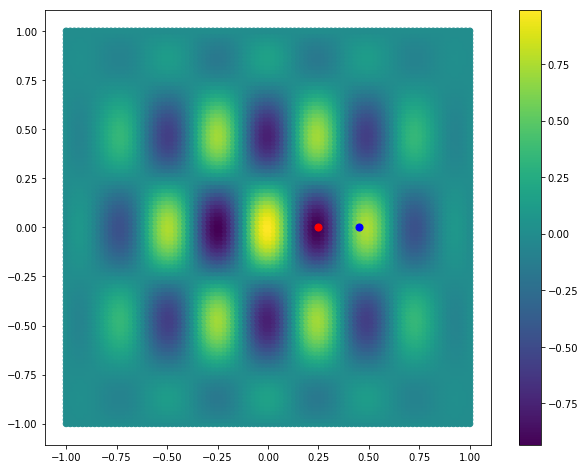

In [17]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(x0[0], x0[1], s=50, c='b')
plt.scatter(res.x[0], res.x[1], s=50, c='r')
plt.colorbar(cb)

Conclusion: lands in the nearest minimum.

### CG

In [18]:
from scipy.optimize import minimize
x0 = [0.45,0.]
res = minimize(f2min, x0=x0, method='CG')

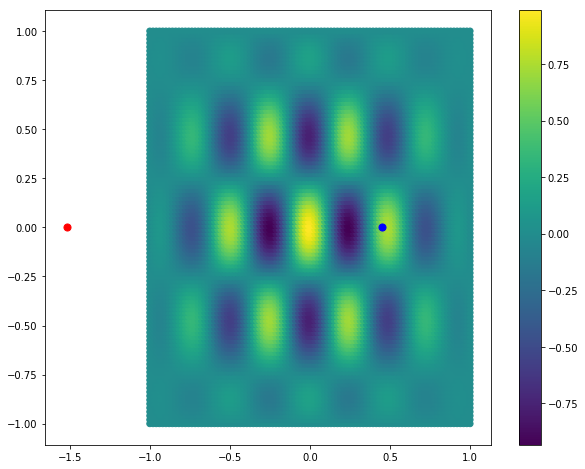

In [19]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(x0[0], x0[1], s=50, c='b', )
plt.scatter(res.x[0], res.x[1], s=50, c='r')
plt.colorbar(cb)

### L-BFGS-B

In [39]:
from scipy.optimize import minimize
x0 = [0.35,0.25]
res = minimize(f2min, x0=x0, method='L-BFGS-B', bounds=[[-1.,1.],[-1.,1.]])

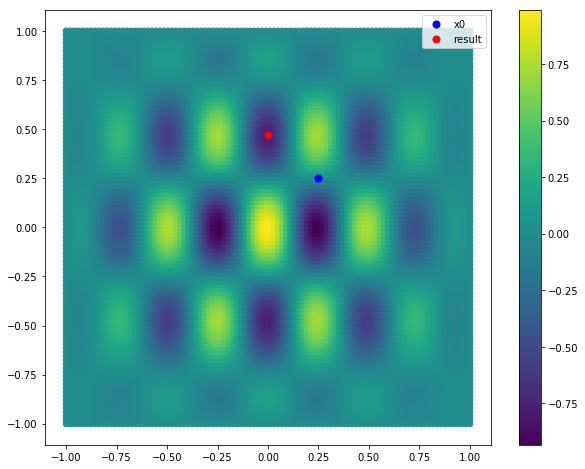

In [52]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(x0[0], x0[1], s=50, c='b', label='x0')
plt.scatter(res.x[0], res.x[1], s=50, c='r', label='result')
plt.colorbar(cb)
plt.legend()

### Conclusion

Simple minimizers can't handle multimodal and degenerate parameter spaces. Will only find **a** global minimum if close enough.

## DIFFERENTIAL EVOLUTION 

scipy.optimize.differential_evolution promises to find the "global optimim". Let's check it out!

In [55]:
from scipy.optimize import differential_evolution as de
res_de = de(f2min, bounds = [(-1.2,1.2),(-1.2,1.2)])

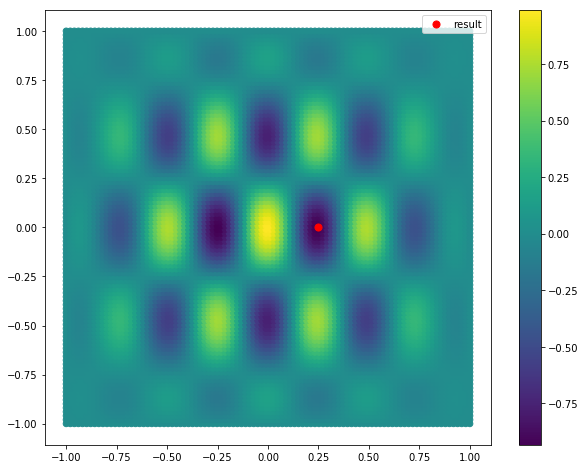

In [56]:
plt.figure(figsize=(10,8))
cb=plt.scatter(xx,yy,c=zz)
plt.scatter(res_de.x[0], res_de.x[1], s=50, c='r', label='result')
plt.colorbar(cb)
plt.legend()

YESSS!!!!